# Simulate a Van Der Pol Oscillator
Generate initial condition and model

In [1]:
from scipy.integrate import odeint
from torchdiffeq import odeint as odeint_nn
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchdiffeq
import torch.nn.functional as F
from torch import nn

In [2]:
# define van der pol dynamics
def VDP(y, t):
    mu = 1
    x1, x2 = y
    dydt = [x2, mu * (1 - x1**2)*x2 - x1]
    return dydt

In [3]:
# define initial conditions and timespan
t = np.linspace(0, 10, 1001)
y0 = [1, 1]

# solve the system
sol = odeint(VDP, y0, t)


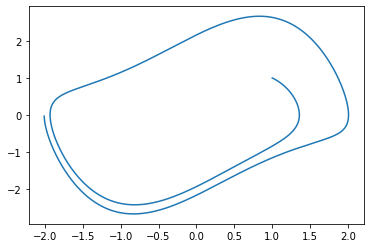

In [4]:
# plot the solution
plt.plot(sol[:, 0], sol[:, 1])
plt.show()

# Generate Training Data
Create a grid of trajectories from random initial conditions between [-2, -2] and [2, 2]


In [126]:
# try it for lots of initial conditions

# generate initial condition span
N = 1000
ti = 0
tf = 10
ts = 101
Y0 = np.random.rand(N,2) * 7 - 3.5
t = np.linspace(ti,tf,ts)
X = np.zeros((ts,N,2))
dt_gt = t[1]
print(dt_gt)
for i in range(N):
    y0 = Y0[i,:]
    sols = odeint(VDP, y0, t, rtol=1.5e-8, atol=1.5e-8)
    X[:,i,:] = sols
    
# Training data dimensioning: 
# X = [trajectory, experiment, (x,y)]
# X = [timespan length, N, 2]

0.1


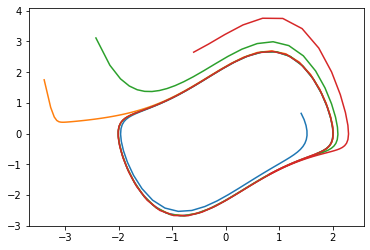

In [127]:
# plot a couple trajectories 

ic = np.random.randint(low=0,high=(N-1))
plt.plot(X[:,ic,0], X[:,ic, 1])
ic = np.random.randint(low=0,high=(N-1))
plt.plot(X[:,ic,0], X[:,ic, 1])
ic = np.random.randint(low=0,high=(N-1))
plt.plot(X[:,ic,0], X[:,ic, 1])
ic = np.random.randint(low=0,high=(N-1))
plt.plot(X[:,ic,0], X[:,ic, 1])




# Define the Network Model and Initialize Optimizer

In [128]:
# define network for Neural-ODE model
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.layer1 = nn.Linear(2, 64)
    self.act1 = nn.Tanh()
    self.layer2 = nn.Linear(64, 64)
    self.act2 = nn.Tanh()
    self.layer3 = nn.Linear(64, 2)

  def forward(self, t, x):
    x = self.layer1(x)
    x = self.act1(x)
    x = self.layer2(x)
    x = self.act2(x)
    x = self.layer3(x)
    
    return x

In [129]:
# define hyper-parameters
num_eval_pts = 101
tspan = np.linspace(0,10,num_eval_pts)
dt_nn = tspan[1]
tspan = torch.Tensor(tspan)

model = Network()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

numIter = 7000
loss_fn = nn.MSELoss()
loss_list = np.zeros((numIter,))
val_loss_list = np.zeros((int(numIter/100),))

# check tspan for pred matches the training data 
# in the future, potentially generate training data alongside the real data
print(dt_nn)
print(dt_gt)


0.1
0.1


In [121]:
# function for viewing intermedeate results 

def disp_pred(t,y0):
    y0_nn = torch.Tensor(y0);
    t_nn = torch.Tensor(t)
    sol = odeint(VDP, y0, t)
    with torch.no_grad():
        pred = odeint_nn(model,y0_nn,t_nn)
    # plot the solution
    plt.figure(1)
    plt.plot(sol[:, 0], sol[:, 1])
    plt.plot(pred[:, 0], pred[:, 1])
    plt.show()


In [130]:
# split train and validation data

X_train = X[:, :900, :]
X_val = X[:, 900:, :]

# Train the Model

In [131]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
num_eval_pts = 11
tspan = np.linspace(0,1,num_eval_pts)
dt_nn = tspan[1]
tspan = torch.Tensor(tspan)
print(dt_nn)
loss_list = np.zeros((numIter,))
val_loss_list = np.zeros((int(numIter/100),))


0.1


loss :  0.7504584193229675
loss :  0.4282699525356293
loss :  0.3017355501651764
loss :  0.33779042959213257
loss :  0.2695344388484955
loss :  0.26460903882980347
loss :  0.29160594940185547
loss :  0.2438691109418869
loss :  0.269607812166214
loss :  0.2369561344385147
loss :  0.2137623429298401


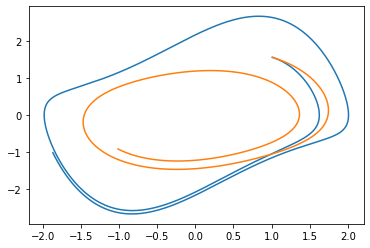

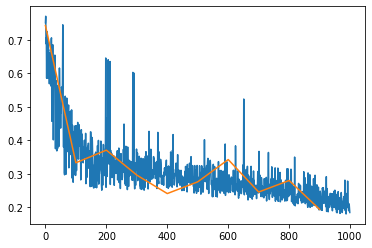

loss :  0.20814988017082214
loss :  0.18505831062793732
loss :  0.13820937275886536
loss :  0.13870491087436676
loss :  0.09793050587177277
loss :  0.3513619005680084
loss :  0.18589463829994202
loss :  0.06221581995487213
loss :  0.0516517274081707
loss :  0.13513344526290894


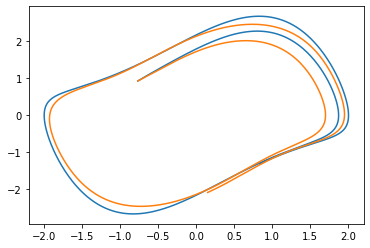

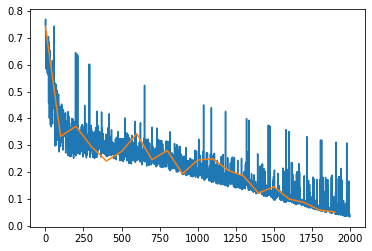

loss :  0.02763344906270504
loss :  0.024718958884477615
loss :  0.01995735615491867
loss :  0.019012631848454475
loss :  0.015359127894043922
loss :  0.0660555511713028
loss :  0.017072513699531555
loss :  0.013932368718087673
loss :  0.015543990768492222
loss :  0.01170135848224163


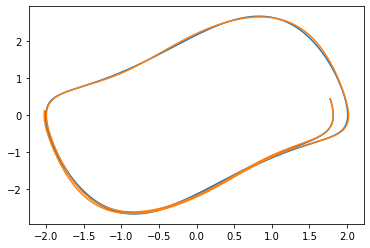

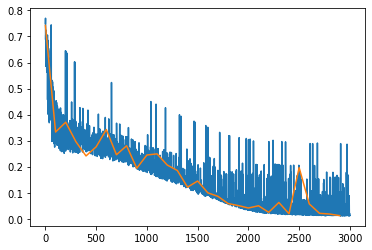

loss :  0.06204364821314812
loss :  0.018066417425870895
loss :  0.018587809056043625
loss :  0.010473248548805714
loss :  0.00981284398585558
loss :  0.013026192784309387
loss :  0.02362883649766445
loss :  0.03285524621605873
loss :  0.011754482984542847
loss :  0.01583399809896946


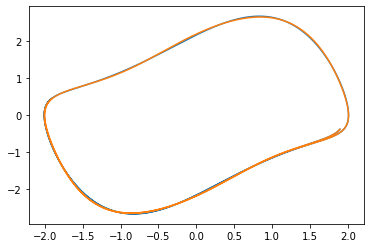

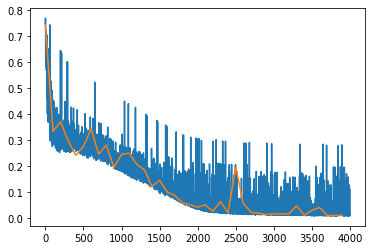

loss :  0.06422540545463562
loss :  0.013965753838419914
loss :  0.012680692598223686
loss :  0.04592399299144745
loss :  0.008264346979558468
loss :  0.01115267351269722
loss :  0.01602373830974102
loss :  0.007066045887768269
loss :  0.00661799032241106
loss :  0.006939256563782692


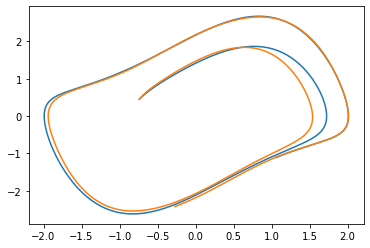

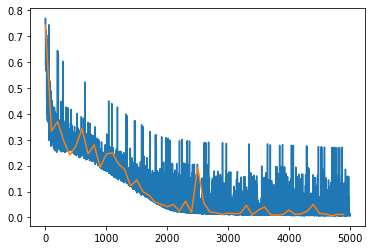

loss :  0.018222330138087273
loss :  0.007573895622044802
loss :  0.013427536003291607
loss :  0.03504154086112976
loss :  0.009636018425226212
loss :  0.037714358419179916
loss :  0.005425716284662485
loss :  0.0073106298223137856
loss :  0.006678001023828983
loss :  0.005468146875500679


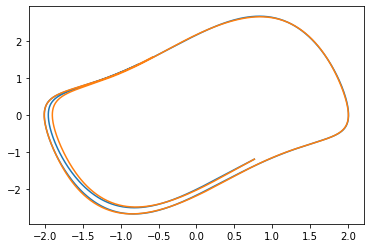

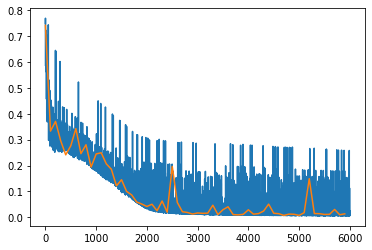

loss :  0.020762264728546143
loss :  0.14009395241737366
loss :  0.04193076118826866
loss :  0.005167918745428324
loss :  0.007676964625716209
loss :  0.006738252472132444
loss :  0.014562120661139488
loss :  0.017178870737552643
loss :  0.02682829275727272


In [132]:
for i in range(numIter):
    #for ic in range(N):
    optimizer.zero_grad()

    idx1 = np.random.randint(low=0,high=(ts-num_eval_pts-1))
    x0 = X_train[idx1,:,:]
    x0 = torch.Tensor(x0)

    targets = X_train[idx1+1:(idx1+num_eval_pts),:,:]
    targets = torch.Tensor(targets)

    # forward pass
    pred = odeint_nn(model, x0, tspan)

    # calculate loss
    #loss = loss_fn(pred[1:] - targets)

    loss = torch.mean(torch.abs(pred[1:] - targets))
    loss_list[i] = loss.item()

    # backwards pass
    loss.backward()
    optimizer.step()
    
    if (i % 100) == 0:
        print("loss : ",loss.item())
        with torch.no_grad():
            idx1 = np.random.randint(low=0,high=(ts-num_eval_pts-1))
            x0 = X_val[idx1,:,:]
            x0 = torch.Tensor(x0)
            targets = X_val[idx1+1:(idx1+num_eval_pts),:,:]
            targets = torch.Tensor(targets)
            pred = odeint_nn(model, x0, tspan)
            val_loss = torch.mean(torch.abs(pred[1:] - targets))
            val_loss_list[int(i/100)] = val_loss.item()
        
    if (i % 1000) == 0:
        if i != 0:
            t = np.linspace(0, 10, 1001)
            test_x0 = [np.random.rand() * 4 - 2, np.random.rand() * 4 - 2]
            disp_pred(t, test_x0)
            plt.figure(2)
            plt.plot(np.arange(0,i), loss_list[:i])
            plt.plot(np.arange(0,i,100), val_loss_list[:(int(i/100))])
            plt.show()

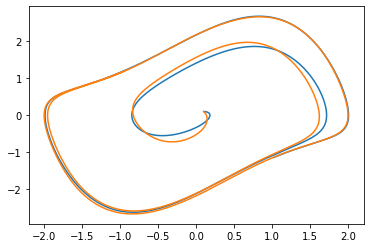

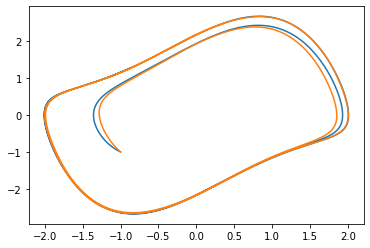

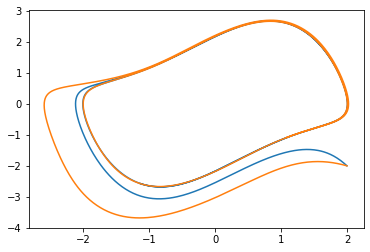

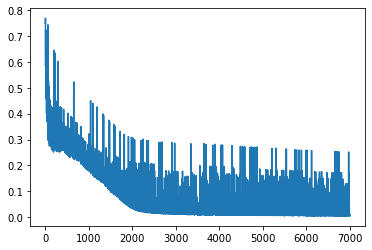

In [133]:
# define initial conditions and timespan
t = np.linspace(0, 15, 1501)
y0 = [0.1, 0.1]
disp_pred(t,y0)
y0 = [-1, -1]
disp_pred(t,y0)
y0 = [2, -2]
disp_pred(t,y0)

plt.plot(loss_list)